## Goal

In this notebook, I want to achieve two things that will hopefully make a GDLN analysis more feasible.
First, I want to 

In [2]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments.batched_online import simulate, make_key

from utils import ipr, entropy, entropy_sort, mean_sort, var_sort, plot_receptive_fields, plot_rf_evolution

def simulate_or_load(**kwargs):
    path_key = make_key(**kwargs)
    if path_key + '.npz' in os.listdir('../localization/results/weights'):
        print('Already simulated')
        data = np.load('../localization/results/weights/' + path_key + '.npz', allow_pickle=True)
        weights_, metrics_ = data['weights'], data['metrics']
    else:
        print('Simulating')
        weights_, metrics_ = simulate(**kwargs)
    return weights_, metrics_

In [3]:
config_ = dict(
  seed=0,
  num_dimensions=40,
  init_scale=1.0,
  model_cls=models.SimpleNet,
  optimizer_fn=optax.sgd,
  batch_size=1000,
  dataset_cls=datasets.NonlinearGPDataset,
  support=(-1, 1),
  class_proportion=0.5,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  save_=True,
  xi1=2,
  xi2=1,
  gain=3,
  activation='relu',
)

Already simulated


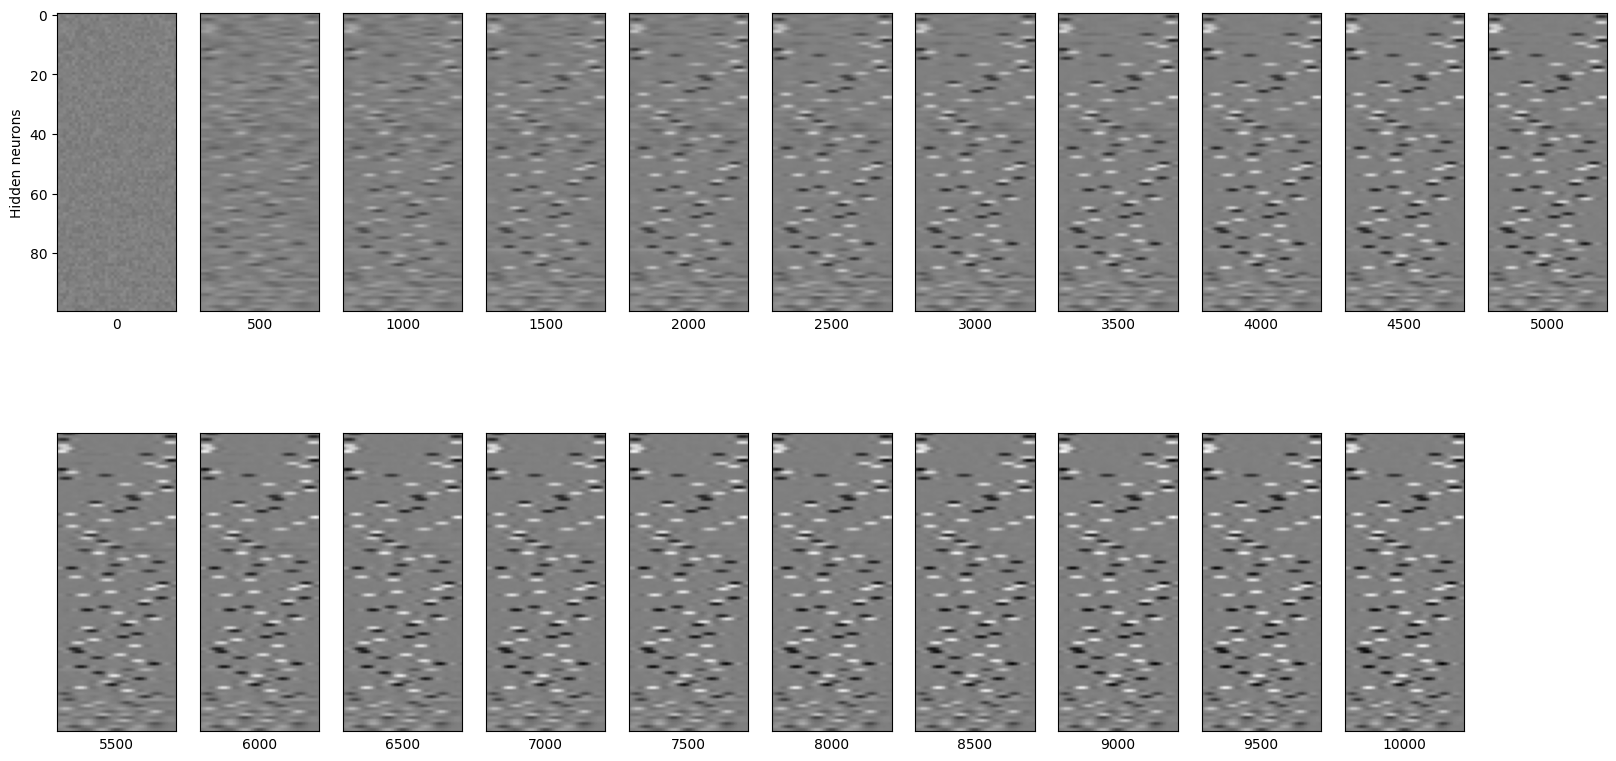

In [6]:
config = config_.copy()
config['num_hiddens'] = 100
config['learning_rate'] = 10.0
config['num_epochs'] = 10000
config['use_bias'] = True

weights100, metrics100 = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights100, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

Already simulated


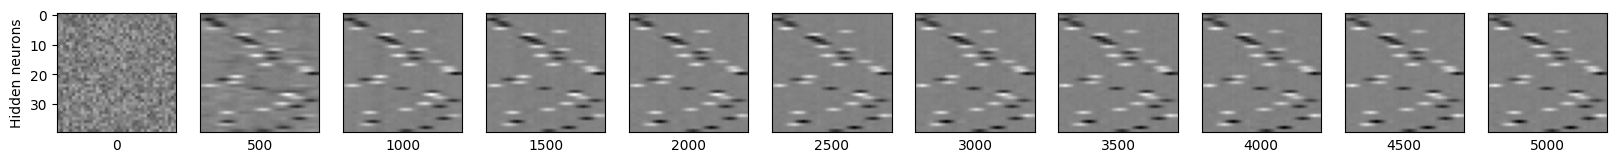

In [7]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 10.0
config['num_epochs'] = 5000
config['use_bias'] = False # Note we are not using a bias term here!

weights40, metrics40 = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights40, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1, center_sort=True)

Already simulated


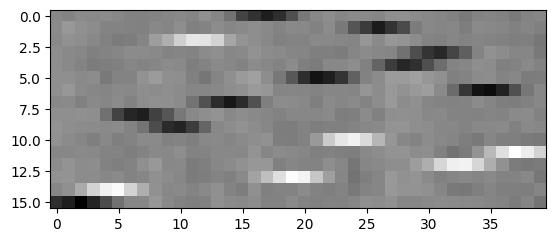

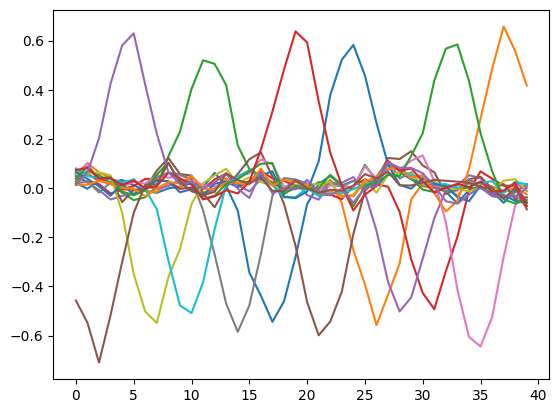

In [8]:
config = config_.copy()
config['num_hiddens'] = 16
config['learning_rate'] = 10.0
config['num_epochs'] = 5000
config['use_bias'] = False

weights16, metrics16 = simulate_or_load(**config)
plt.imshow(weights16[-1], cmap='gray')
plt.show()
_ = plt.plot(weights16[-1].T)

Already simulated


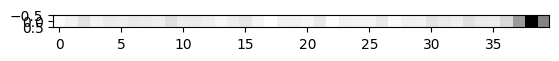

In [9]:
config = config_.copy()
config['num_hiddens'] = 1
config['learning_rate'] = 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights1, metrics1 = simulate_or_load(**config)
_ = plt.imshow(weights1[-1], cmap='gray')

Already simulated


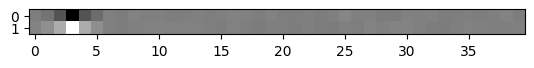

In [10]:
# COOL!
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights2, metrics2 = simulate_or_load(**config)
_ = plt.imshow(weights2[-1], cmap='gray')

In [8]:
# let's try another seed - COOL!
config['seed'] = 42
config['save_'] = False
weights2b, metrics2b = simulate(**config)
plt.imshow(weights2b[-1], cmap='gray')

Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x159bf84a0>,
 'init_scale': 1.0,
 'kwargs': {},
 'learning_rate': 0.5,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x1568a3f60>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': False,
 'seed': 42,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
SimpleNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  act=<wrapped function relu>
)

Starting evaluation...
Comple

KeyboardInterrupt: 

Already simulated


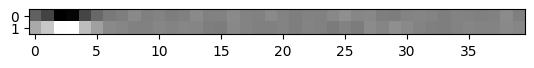

In [11]:
# let's try it with a bias term - COOL!
config['seed'] = 0
config['save_'] = True
config['use_bias'] = True
weights2bias, metrics2bias = simulate_or_load(**config)
_ = plt.imshow(weights2bias[-1], cmap='gray')

Already simulated


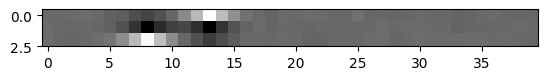

In [12]:
# how about 3 hidden units? - WOAH!
config = config_.copy()
config['num_hiddens'] = 3
config['learning_rate'] = 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights3, metrics3 = simulate_or_load(**config)
_ = plt.imshow(weights3[-1], cmap='gray')

Already simulated


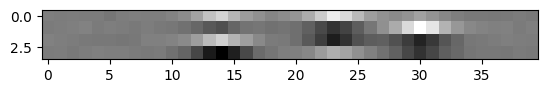

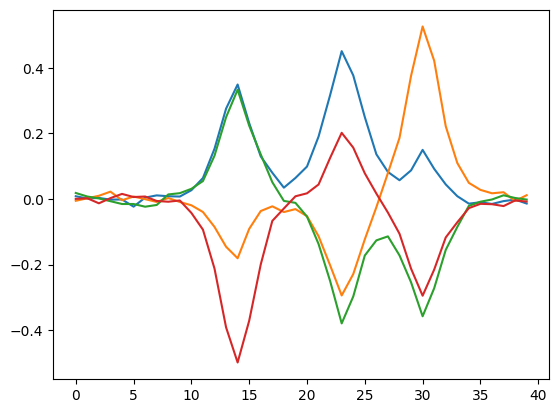

In [13]:
# how about 4 hidden units?
config = config_.copy()
config['num_hiddens'] = 4
config['learning_rate'] = 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights4, metrics4 = simulate_or_load(**config)
plt.imshow(weights4[-1], cmap='gray')
plt.show()
_ = plt.plot(weights4[-1].T)

Already simulated


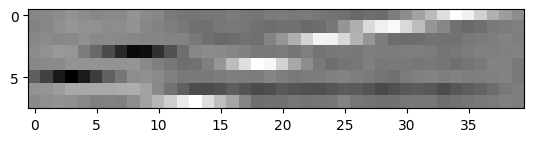

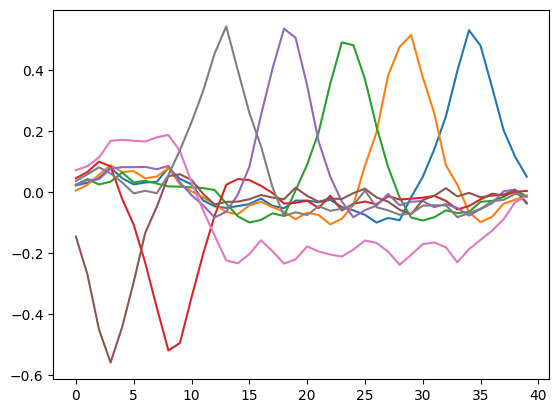

In [14]:
# how about 8 hidden units?
config = config_.copy()
config['num_hiddens'] = 8
config['learning_rate'] = 2.0 # 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights8, metrics8 = simulate_or_load(**config)
plt.imshow(weights8[-1], cmap='gray')
plt.show()
_ = plt.plot(weights8[-1].T)

Already simulated


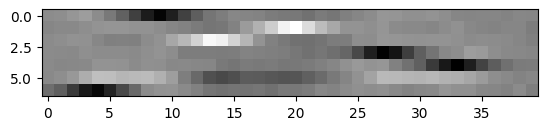

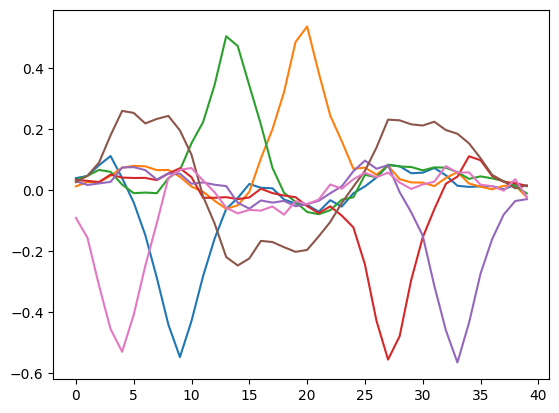

In [15]:
# how about 7 hidden units?
config = config_.copy()
config['num_hiddens'] = 7
config['learning_rate'] = 2.0 # 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights7, metrics7 = simulate_or_load(**config)
plt.imshow(weights7[-1], cmap='gray')
plt.show()
_ = plt.plot(weights7[-1].T)

Already simulated


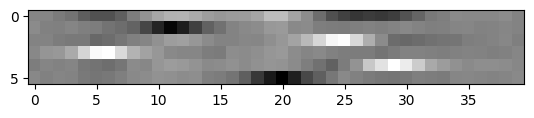

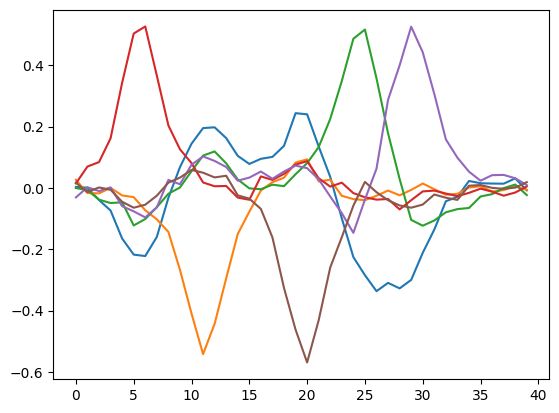

In [16]:
# how about 6 hidden units?
config = config_.copy()
config['num_hiddens'] = 6
config['learning_rate'] = 2.0 # 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights6, metrics6 = simulate_or_load(**config)
plt.imshow(weights6[-1], cmap='gray')
plt.show()
_ = plt.plot(weights6[-1].T)

Already simulated


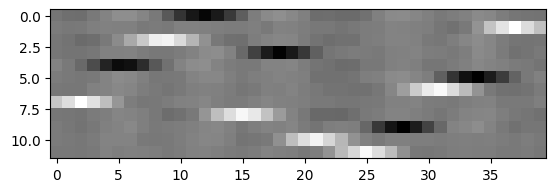

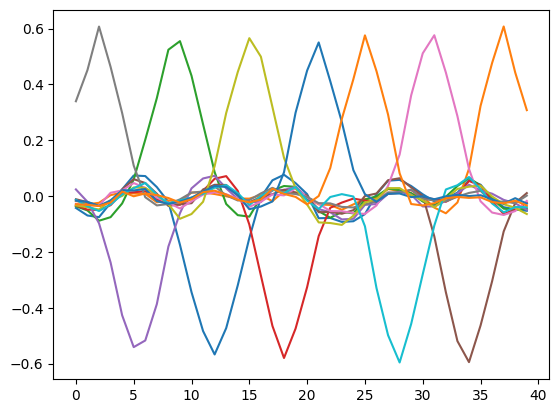

In [17]:
# how about 12 hidden units? - SEEMS LIKE A GOOD NUMBER! no complete overlap
# do I see ripples???
config = config_.copy()
config['num_hiddens'] = 12
config['learning_rate'] = 2.0 # 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights12, metrics12 = simulate_or_load(**config)
plt.imshow(weights12[-1], cmap='gray')
plt.show()
_ = plt.plot(weights12[-1].T)

Already simulated


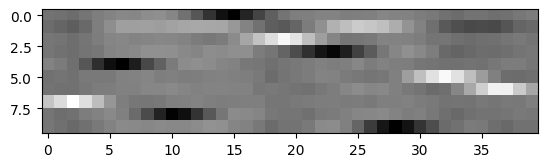

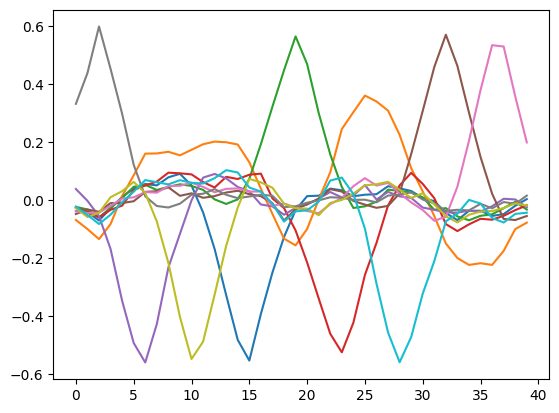

In [18]:
# how about 10 hidden units? - not as nice as 12, since we get a two-bump RF
config = config_.copy()
config['num_hiddens'] = 10
config['learning_rate'] = 2.0 # 0.5
config['num_epochs'] = 5000
config['use_bias'] = False

weights10, metrics10 = simulate_or_load(**config)
plt.imshow(weights10[-1], cmap='gray')
plt.show()
_ = plt.plot(weights10[-1].T)

### Quick summary

It seems like there a few interesting cases that stand out:
- $K = 1$, simplest model, but does not learn a localized RF
- $K = 2$, simplest model that learns localized RFs.
  They seem to always be paired perfectly (based on two examples...)! 
  This is related to the requirement that the output be invariant to sign flips of the input, but it doesn't necessitate this structure. 
  I find this entanglement very interesting. 
  When we move to larger $K$, this strict entanglement disappears, and we instead want a roughly balanced number of "positive" and "negative" RFs that each come close to tiling the space.
- $K = 3$, simplest model where we get both localized RFs, and RFs that learn two bumps.
- $K = 6$, simplest modle where we get localized RFs and an RF that looks like a long sinusoid, or perhaps just a weird-looking version of the two bump RF we had for $K = 3$.
- $K = 12$, simplest model where I see only localized RFs that tile the space without redundancy

## Towards a gating architecture

Let's try to understand what a plausible gating architecture might be by focusing on two examples: $K = 2$ and $K = 12$.
We'll see how their (pre-)activation for a _fixed_ input vary during training.
If the sign is constant, then a gating structure may be very plausible.
If not, we'll have to do some more thinking.

We'll start with $K = 2$.

Already simulated


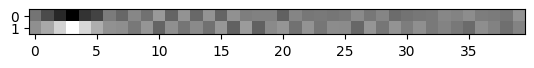

In [18]:
# re-run K=2 with a lower learning rate
# COOL!
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 2000
config['use_bias'] = False

weights2, metrics2 = simulate_or_load(**config)
_ = plt.imshow(weights2[-1], cmap='gray')

In [19]:
# dataset
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), **config_)
x, y = dataset[:1000]
print(f"y = {y[0]}, {y[1]}")
print(f"x.shape = {x.shape}")

y = 1.0, 1.0
x.shape = (1000, 40)


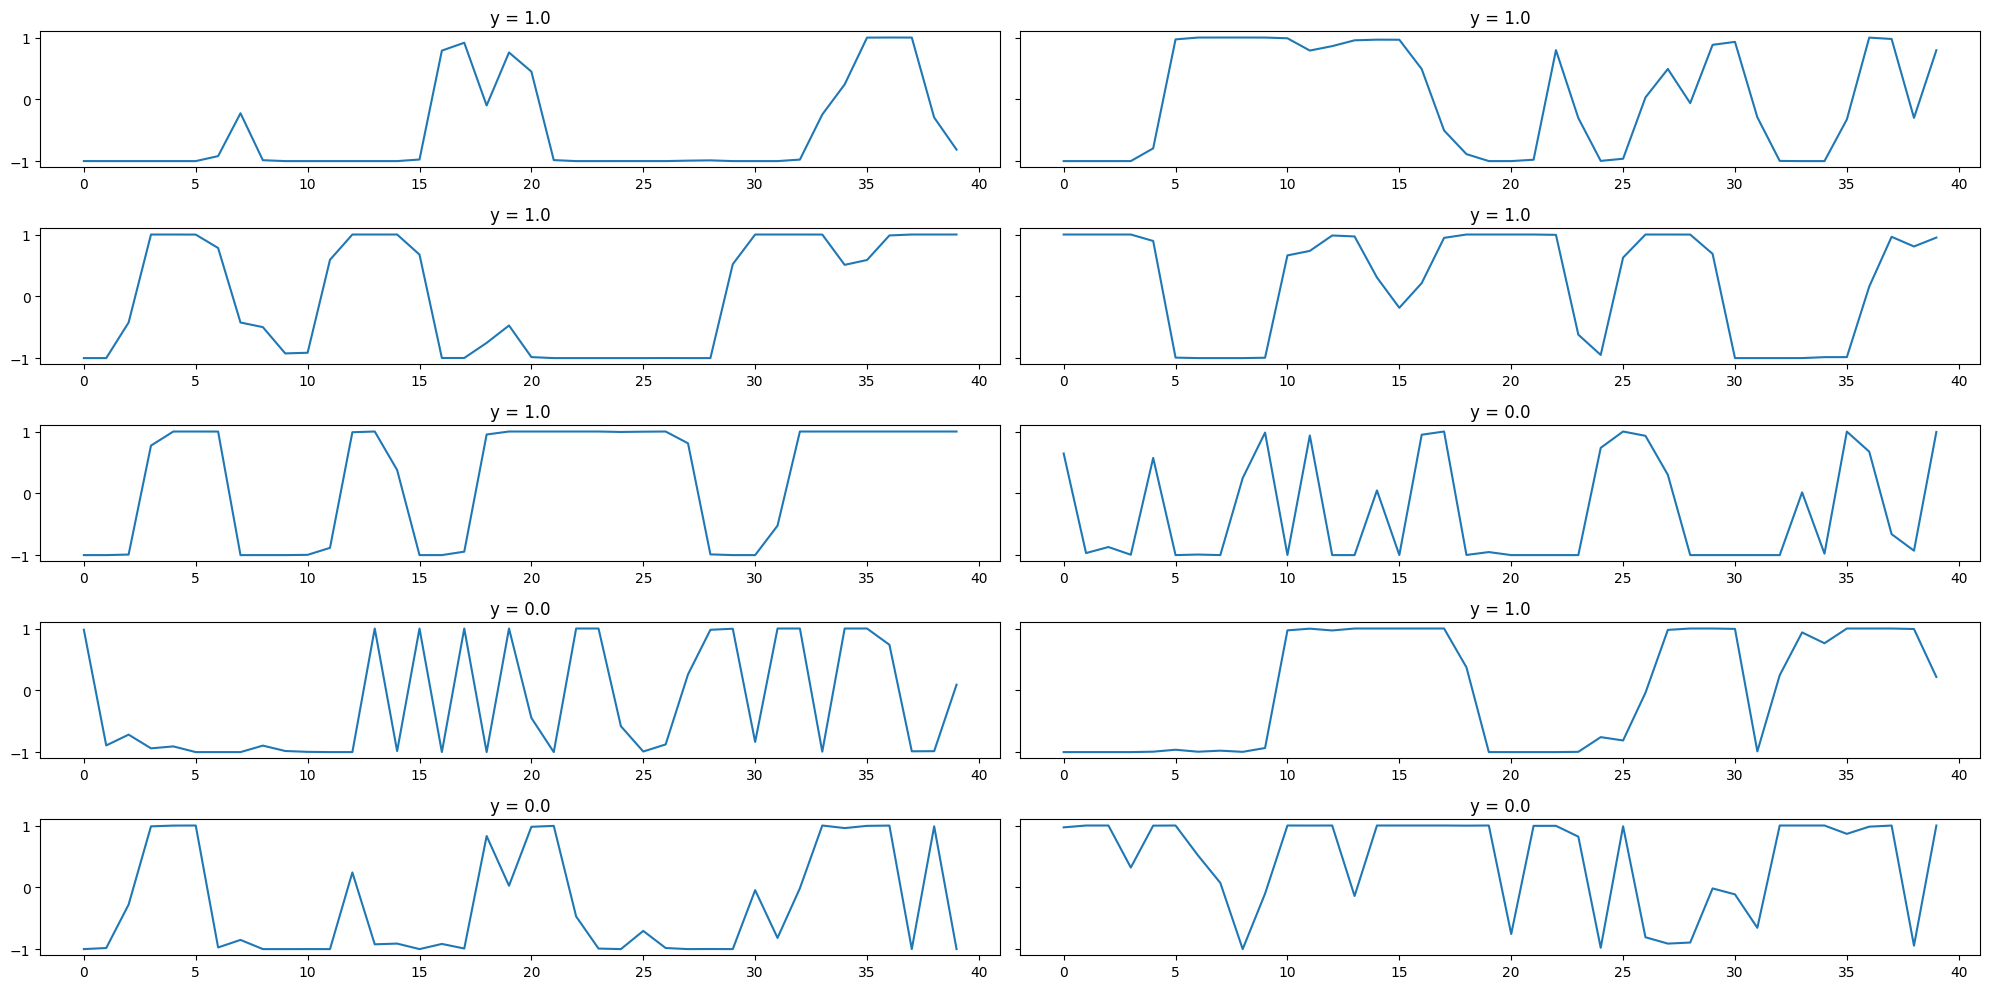

In [20]:
# plot the data
fig, axs = plt.subplots(5, 2, figsize=(20, 10), sharey=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(x[i])
    ax.set_title(f"y = {y[i]}")
fig.tight_layout()

#### What if we played with initialization?

Already simulated


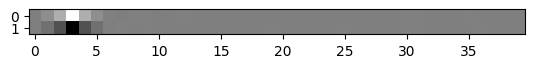

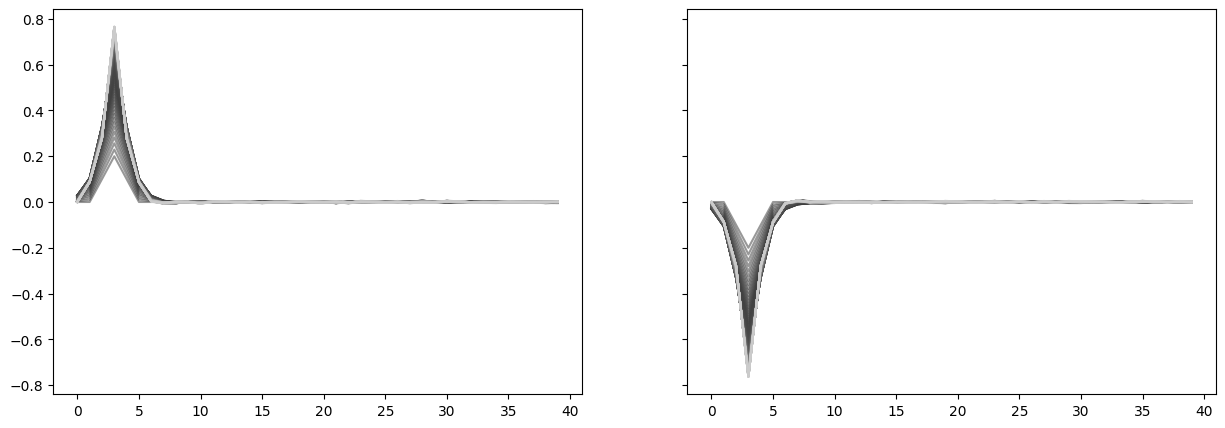

In [23]:
# re-run K=2 with a lower learning rate
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.small_bump_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping

weights2_sb, metrics2_sb = simulate_or_load(**config)
_ = plt.imshow(weights2_sb[-1], cmap='gray')
fig, axs = plot_rf_evolution(weights2_sb, num_rows=1, num_cols=2, cmap='gray')

##### Looks a lot better!

But are the receptive fields qualitatively the same as if we Gaussian initialization?

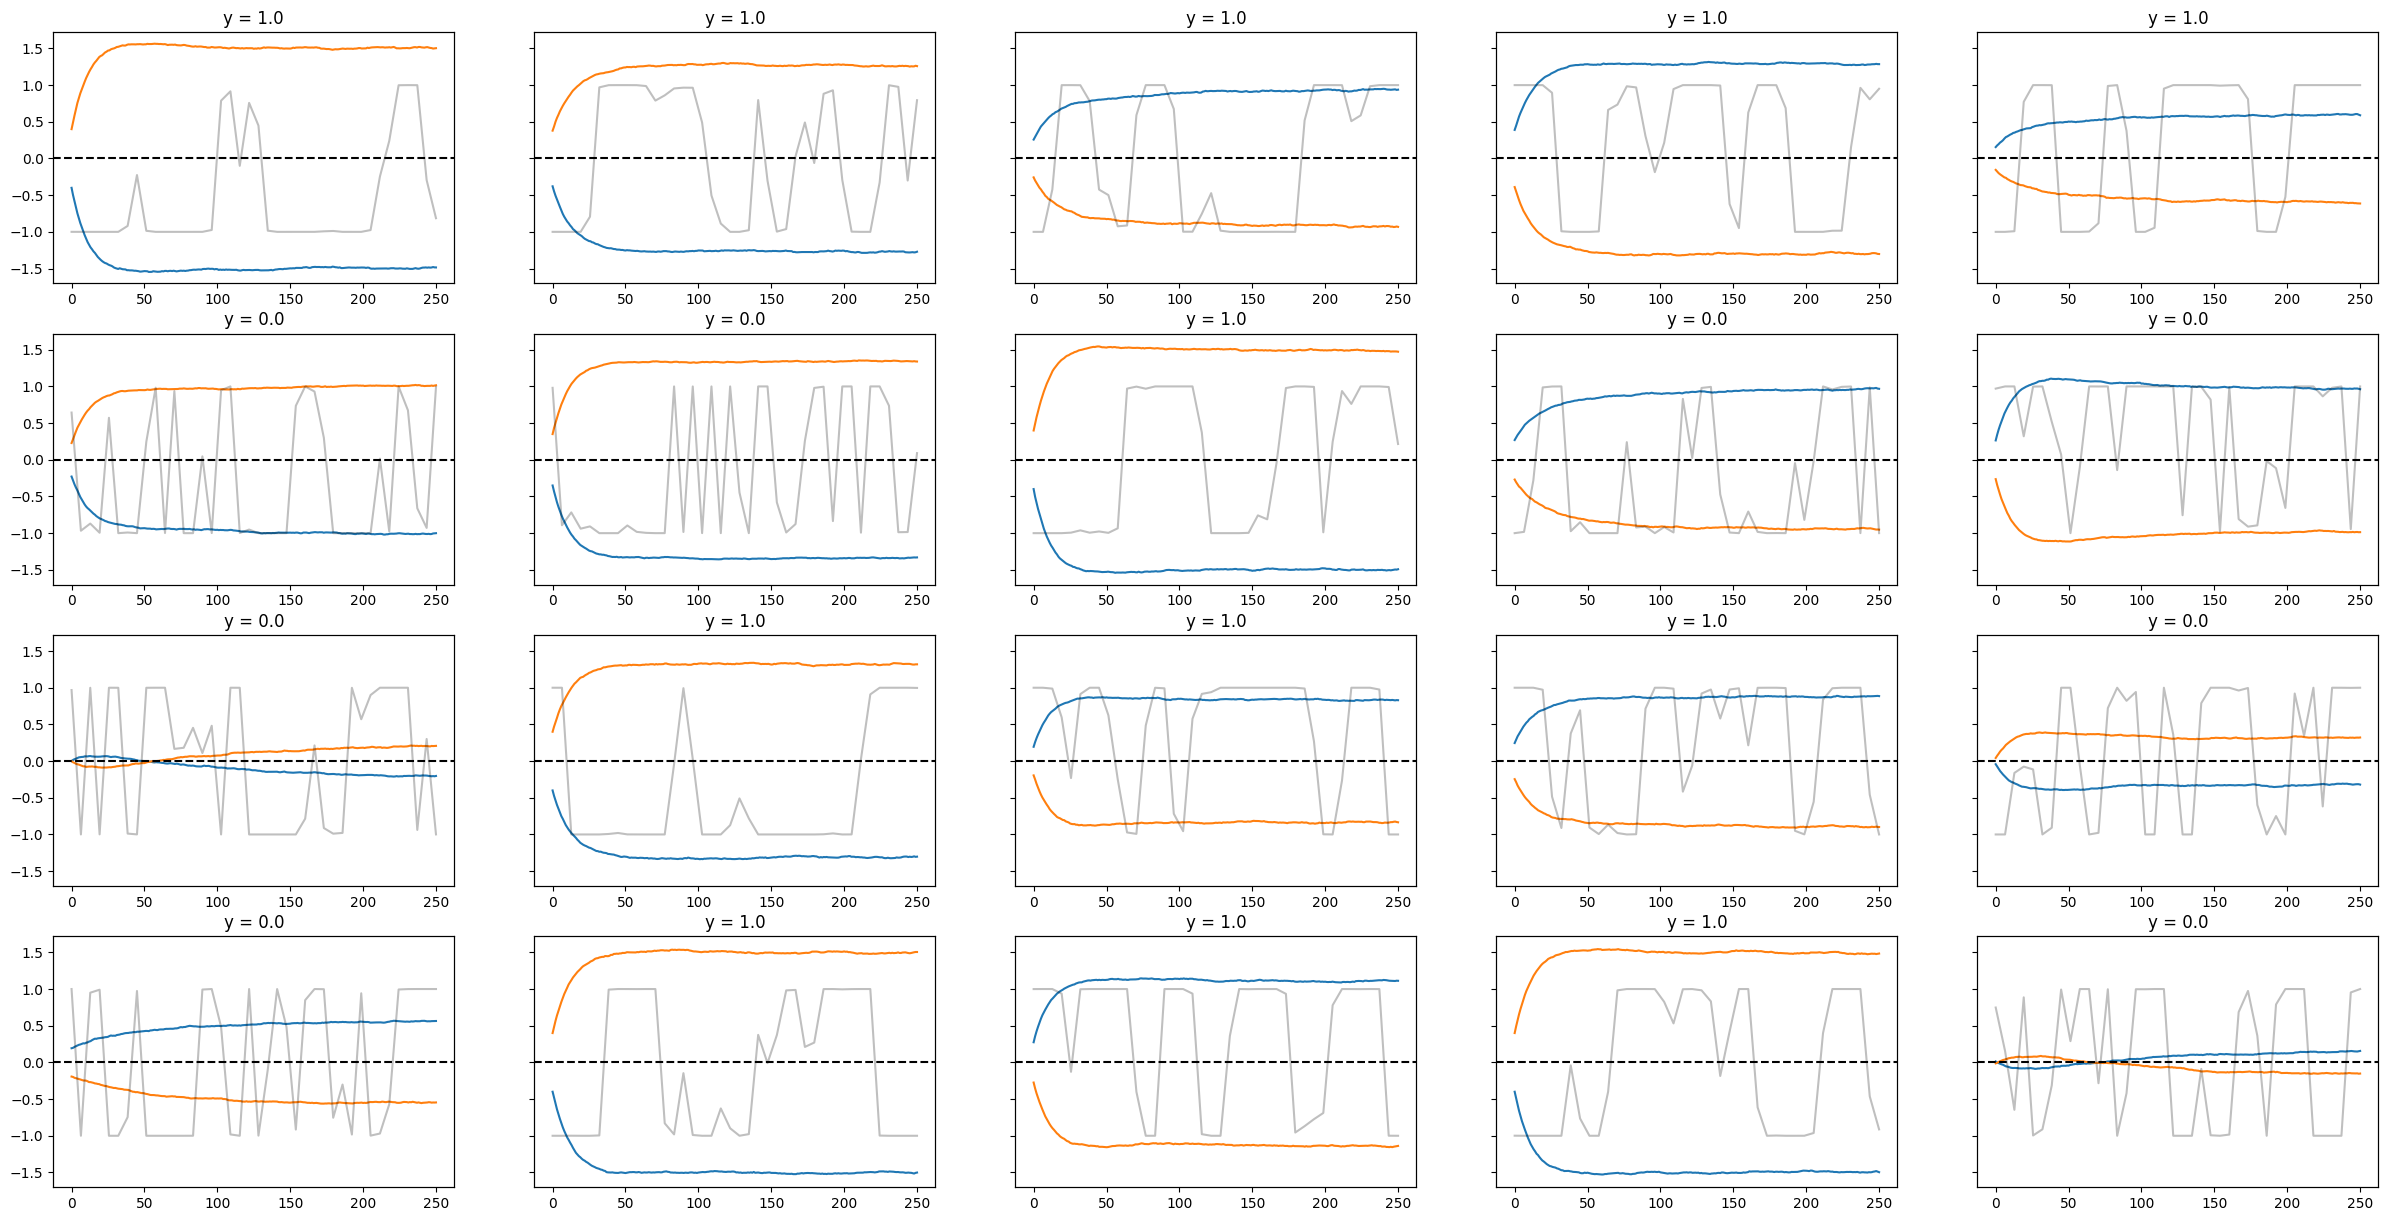

In [24]:
preacts2_sb = weights2_sb @ x.T
fig, axs = plt.subplots(4, 5, figsize=(30, 15), sharey=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(preacts2_sb[:,:,i])
    ax_ = ax.twiny()
    ax_.plot(x[i], color='k', alpha=0.25)
    ax_.set_xticks([])
    ax.set_title(f"y = {y[i]}")
    ax.axhline(0, color='k', linestyle='--')

##### Confirming small bump initialization yields same results as Gaussian

Already simulated


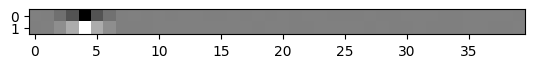

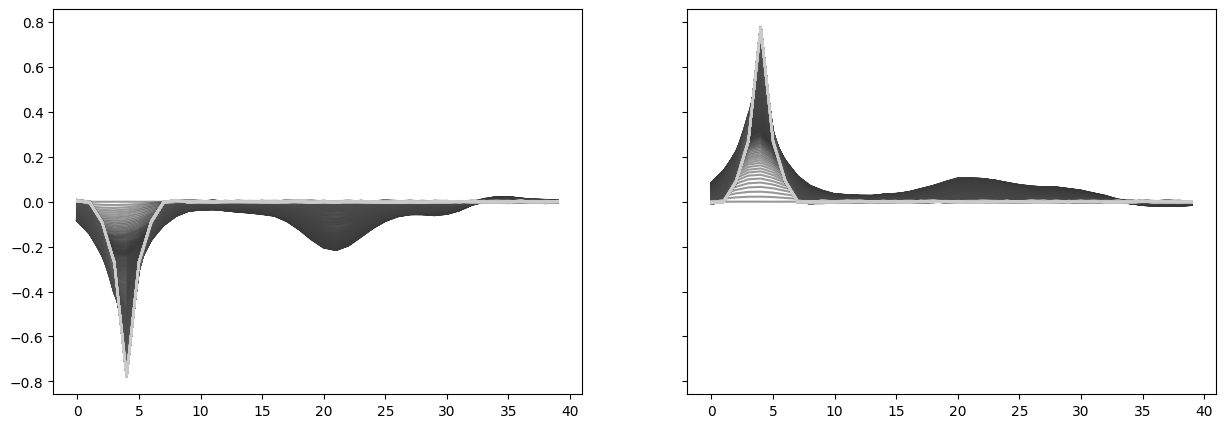

In [25]:
# re-run previous settings, but with Gaussian init instead of small bump
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 20000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-6

weights2, metrics2 = simulate_or_load(**config)
_ = plt.imshow(weights2[-1], cmap='gray')
plt.show()
fig, axs = plot_rf_evolution(weights2, num_rows=1, num_cols=2, cmap='gray')

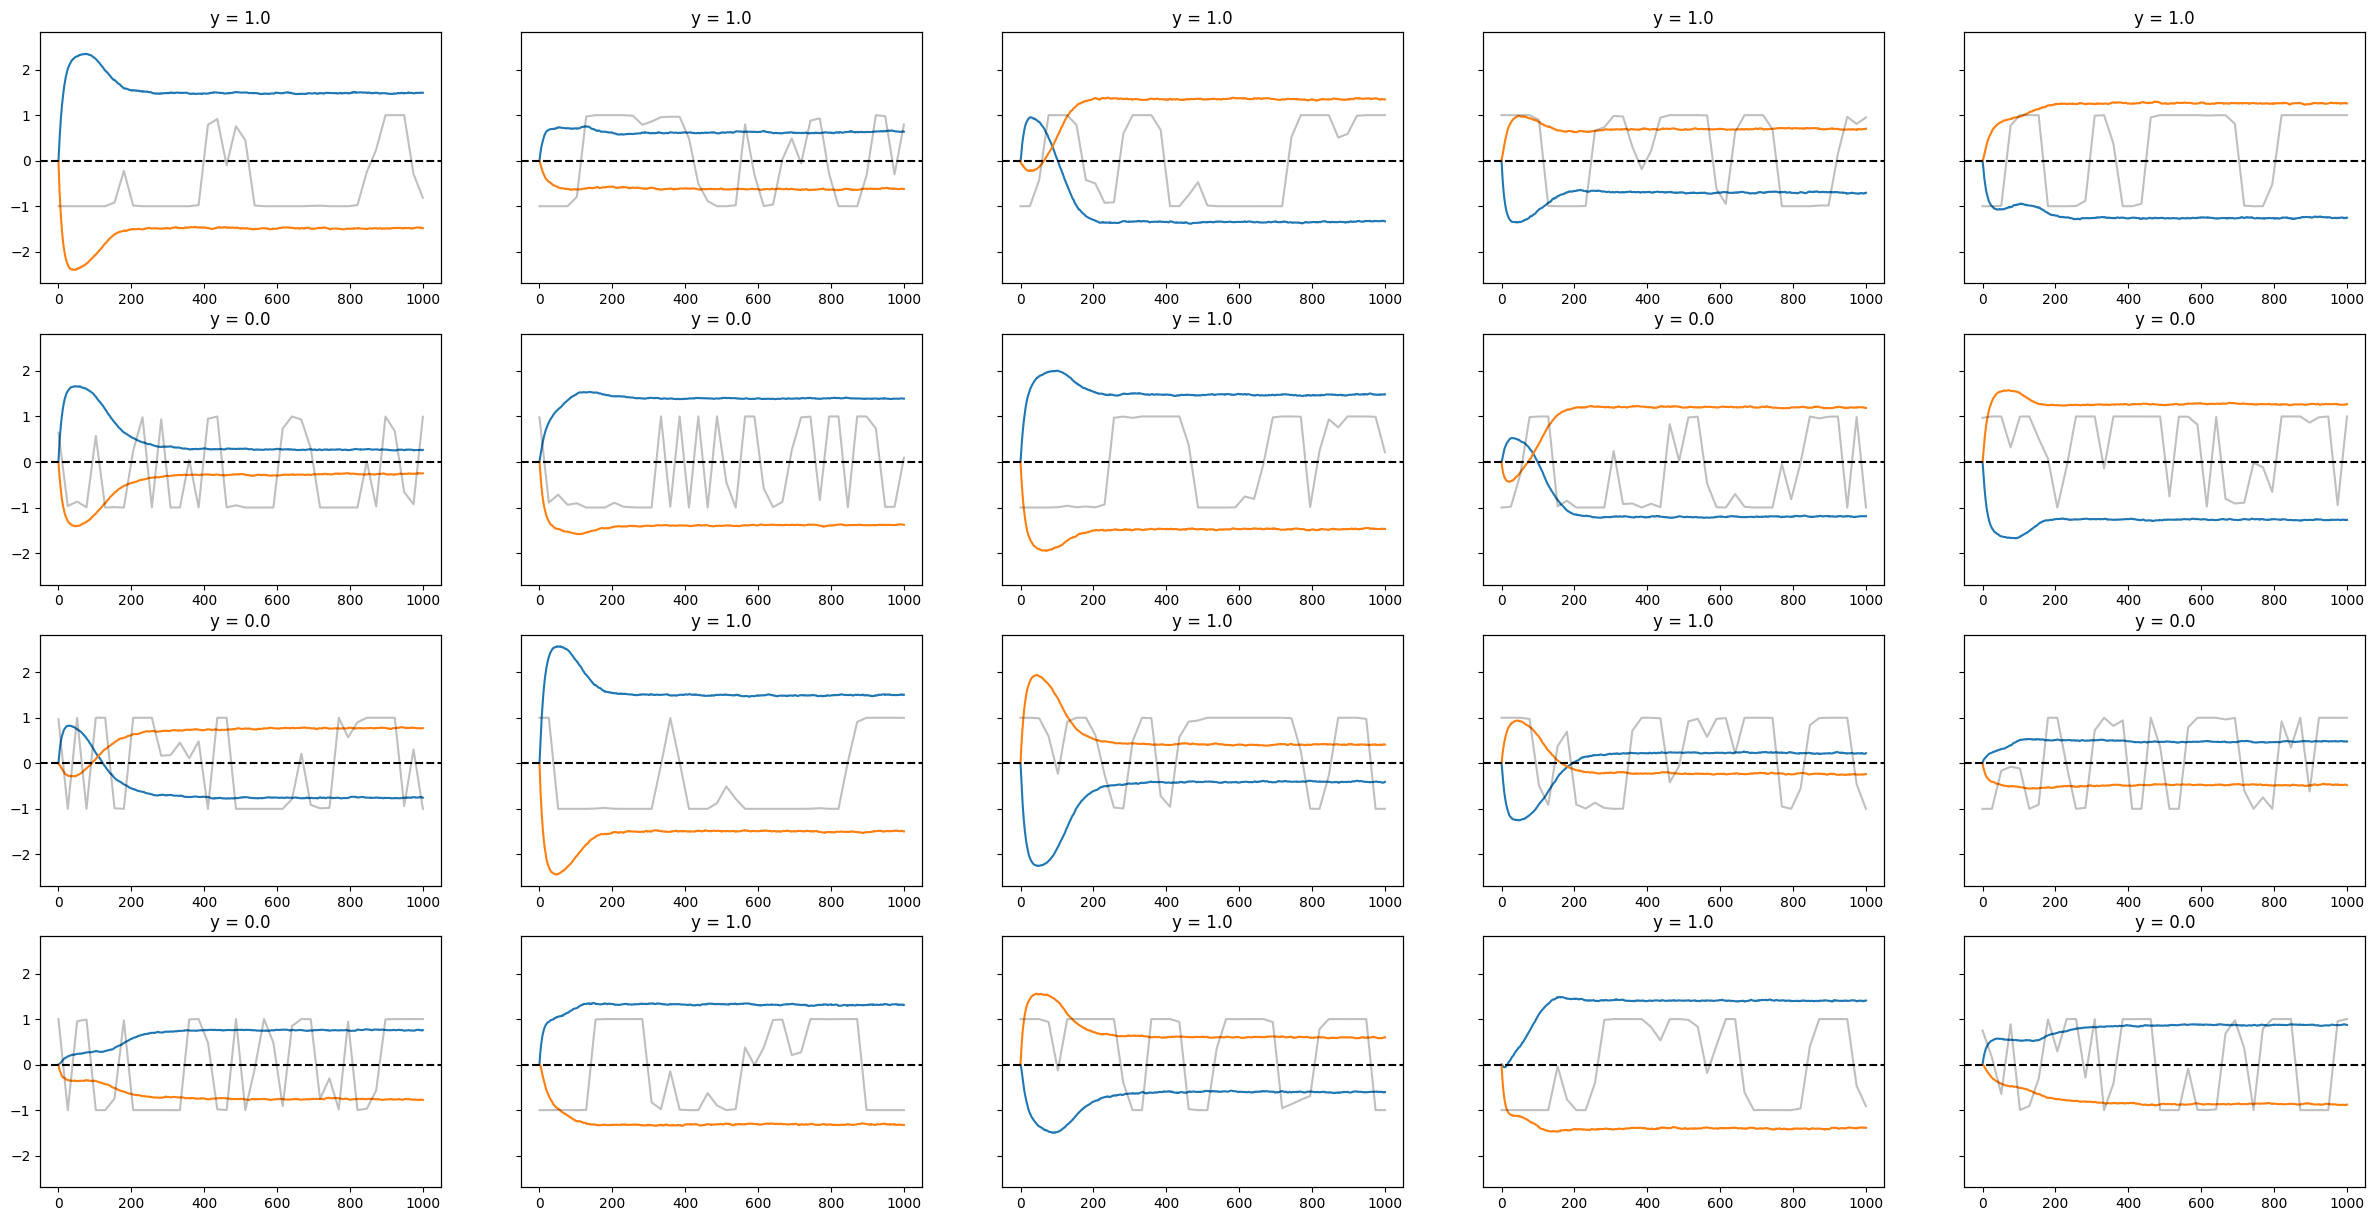

In [10]:
preacts2 = weights2 @ x.T
fig, axs = plt.subplots(4, 5, figsize=(30, 15), sharey=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(preacts2[:,:,i])
    ax_ = ax.twiny()
    ax_.plot(x[i], color='k', alpha=0.25)
    ax_.set_xticks([])
    ax.set_title(f"y = {y[i]}")
    ax.axhline(0, color='k', linestyle='--')

Let's plot the final RFs for the two initializations on top of each other.

Seem sufficiently similar to me!

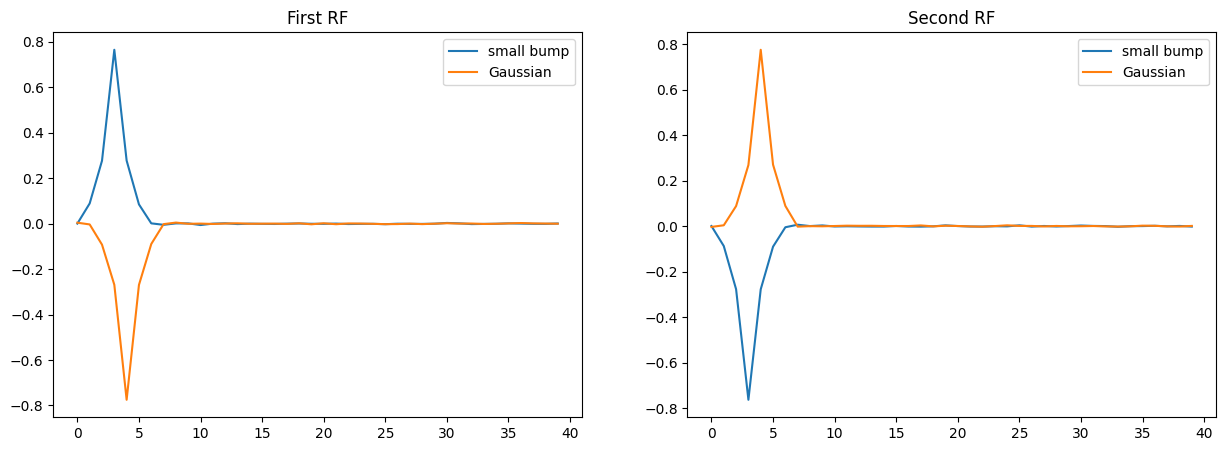

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(weights2_sb[-1,0], label='small bump')
ax1.plot(weights2[-1,0], label='Gaussian')
ax1.set_title('First RF')
ax1.legend()
ax2.plot(weights2_sb[-1,1], label='small bump')
ax2.plot(weights2[-1,1], label='Gaussian')
ax2.set_title('Second RF')
ax2.legend()

#### How often does initial sign agree with sign at timestep t?

The small bump definitely works better!

Weird how it drops, then rises with $t=0$.

Text(0.5, 1.0, 't=100')

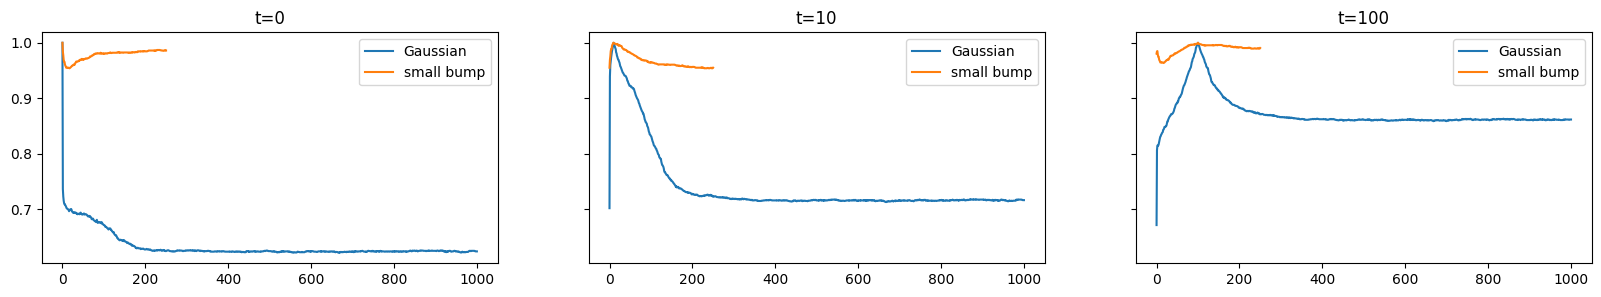

In [99]:
sign = (preacts2 > 0).astype(int)
sign_sb = (preacts2_sb > 0).astype(int)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 3), sharey=True)

ax1.plot((sign == sign[0]).mean(axis=1).mean(axis=1), label='Gaussian')
ax1.plot((sign_sb == sign_sb[0]).mean(axis=1).mean(axis=1), label='small bump')
ax1.legend()
# ax1.set_ylim(0.65, 1.05)
ax1.set_title(f't=0')

ax2.plot((sign == sign[10]).mean(axis=1).mean(axis=1), label='Gaussian')
ax2.plot((sign_sb == sign_sb[10]).mean(axis=1).mean(axis=1), label='small bump')
ax2.legend()
# ax2.set_ylim(0.65, 1.05)
ax2.set_title(f't=10')

ax3.plot((sign == sign[100]).mean(axis=1).mean(axis=1), label='Gaussian')
ax3.plot((sign_sb == sign_sb[100]).mean(axis=1).mean(axis=1), label='small bump')
ax3.legend()
# ax3.set_ylim(0.65, 1.05)
ax3.set_title(f't=100')

Accuracy doesn't capture the phenomenon I observed where, when we use the small bump initialization, the preactivation only flips sign when it is extremely close to 0.
This fact would better be captured by measuring the loss when we incorrectly predict the sign, which I do below.

We see that we can predict the sign of the preactivation at almost timestep with rather small error.
However, it's not zero—this may present an issue with our approximation.
Is there any way that we can fix this?

Text(0.5, 1.0, 't=100')

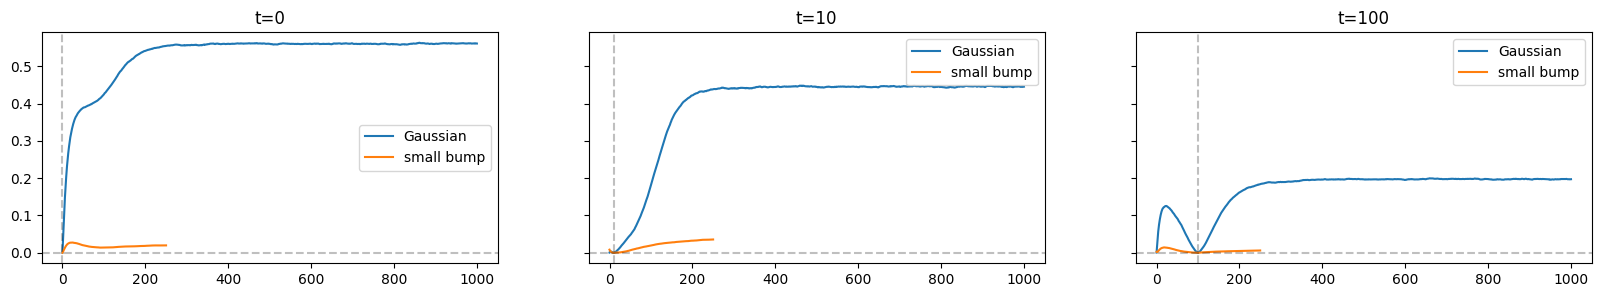

In [100]:
sign = (preacts2 > 0).astype(int)
sign_sb = (preacts2_sb > 0).astype(int)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 3), sharey=True)

ax1.plot( np.sqrt(np.square((sign != sign[0]) * preacts2).mean(axis=1).mean(axis=1)), label='Gaussian')
ax1.plot( np.sqrt(np.square((sign_sb != sign_sb[0]) * preacts2_sb).mean(axis=1).mean(axis=1)), label='small bump')
ax1.legend()
# ax1.set_ylim(0.65, 1.05)
ax1.set_title(f't=0')
ax1.axvline(0, color='k', linestyle='--', alpha=0.25)
ax1.axhline(0, color='k', linestyle='--', alpha=0.25)
# ax1.set_yscale('log')

ax2.plot( np.sqrt(np.square((sign != sign[10]) * preacts2).mean(axis=1).mean(axis=1)), label='Gaussian')
ax2.plot( np.sqrt(np.square((sign_sb != sign_sb[10]) * preacts2_sb).mean(axis=1).mean(axis=1)), label='small bump')
ax2.legend()
# ax2.set_ylim(0.65, 1.05)
ax2.axvline(10, color='k', linestyle='--', alpha=0.25)
ax2.axhline(0, color='k', linestyle='--', alpha=0.25)
ax2.set_title(f't=10')

ax3.plot( np.sqrt(np.square((sign != sign[100]) * preacts2).mean(axis=1).mean(axis=1)), label='Gaussian')
ax3.plot( np.sqrt(np.square((sign_sb != sign_sb[100]) * preacts2_sb).mean(axis=1).mean(axis=1)), label='small bump')
ax3.legend()
# ax3.set_ylim(0.65, 1.05)
ax3.axvline(100, color='k', linestyle='--', alpha=0.25)
ax3.axhline(0, color='k', linestyle='--', alpha=0.25)
ax3.set_title(f't=100')

In [ ]:
sign = (preacts2 > 0).astype(int)
sign_sb = (preacts2_sb > 0).astype(int)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 3), sharey=True)

ax1.plot( np.sqrt(np.square((sign != sign[0]) * preacts2).mean(axis=1).mean(axis=1)), label='Gaussian')
ax1.plot( np.sqrt(np.square((sign_sb != sign_sb[0]) * preacts2_sb).mean(axis=1).mean(axis=1)), label='small bump')
ax1.legend()
# ax1.set_ylim(0.65, 1.05)
ax1.set_title(f't=0')
ax1.axvline(0, color='k', linestyle='--', alpha=0.25)
ax1.axhline(0, color='k', linestyle='--', alpha=0.25)
# ax1.set_yscale('log')

ax2.plot( np.sqrt(np.square((sign != sign[10]) * preacts2).mean(axis=1).mean(axis=1)), label='Gaussian')
ax2.plot( np.sqrt(np.square((sign_sb != sign_sb[10]) * preacts2_sb).mean(axis=1).mean(axis=1)), label='small bump')
ax2.legend()
# ax2.set_ylim(0.65, 1.05)
ax2.axvline(10, color='k', linestyle='--', alpha=0.25)
ax2.axhline(0, color='k', linestyle='--', alpha=0.25)
ax2.set_title(f't=10')

ax3.plot( np.sqrt(np.square((sign != sign[100]) * preacts2).mean(axis=1).mean(axis=1)), label='Gaussian')
ax3.plot( np.sqrt(np.square((sign_sb != sign_sb[100]) * preacts2_sb).mean(axis=1).mean(axis=1)), label='small bump')
ax3.legend()
# ax3.set_ylim(0.65, 1.05)
ax3.axvline(100, color='k', linestyle='--', alpha=0.25)
ax3.axhline(0, color='k', linestyle='--', alpha=0.25)
ax3.set_title(f't=100')

#### Let's see if a GDLN with this architecture works!

It seems like it does (with the small bump initialization)!

Next step will be to see how well this works with the Gaussian data instead of the small bump.
(It probably won't work at all.)

In [26]:
first_bump = weights2_sb[0,0]

def gate(x):
    """
    The code below is a differentiable version of:
        pos_pre = jnp.dot(x, pos_bump)
        if pos_pre >= 0:
            return jnp.array([1., 0.])
        return jnp.array([0., 1.])
    """
    first_pre = jnp.dot(x, first_bump)
    w_ = first_pre / (jnp.abs(first_pre) + 1e-8)
    w = (w_ + 1) / 2
    return jnp.array([w, 1 - w])

Already simulated


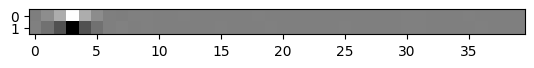

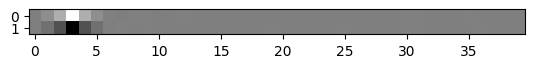

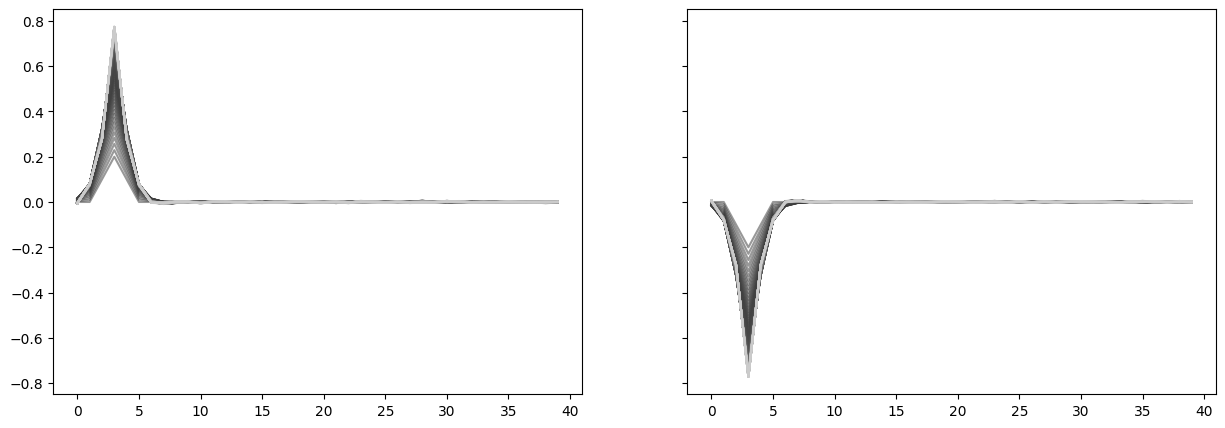

In [32]:
# COOL!
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.small_bump_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping
config['model_cls'] = models.GatedNet
config['activation'] = gate

weights2_sb_gdln, metrics2_sb_gdln = simulate_or_load(**config)
_ = plt.imshow(weights2_sb_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2_sb[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_sb_gdln, num_rows=1, num_cols=2, cmap='gray')

##### Now, with Gaussian data

In [44]:
first_bump = weights2[0,0] # note the first RF is negative when we train with Gaussian init

def gate(x):
    """
    The code below is a differentiable version of:
        pos_pre = jnp.dot(x, pos_bump)
        if pos_pre >= 0:
            return jnp.array([1., 0.])
        return jnp.array([0., 1.])
    """
    first_pre = jnp.dot(x, first_bump)
    w_ = first_pre / (jnp.abs(first_pre) + 1e-8)
    w = (w_ + 1) / 2
    return jnp.array([w, 1 - w])

Using JAX backend: cpu

Using configuration:
{'activation': <function gate at 0x16172b6a0>,
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 20,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x15b9302c0>,
 'init_scale': 1e-06,
 'kwargs': {},
 'learning_rate': 0.01,
 'model_cls': <class 'localization.models.feedforward.GatedNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x1585fc040>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
GatedNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  gate=<fun

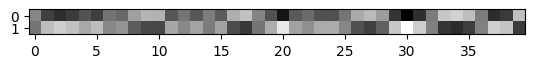

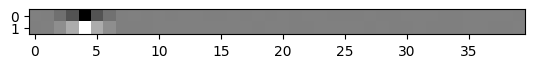

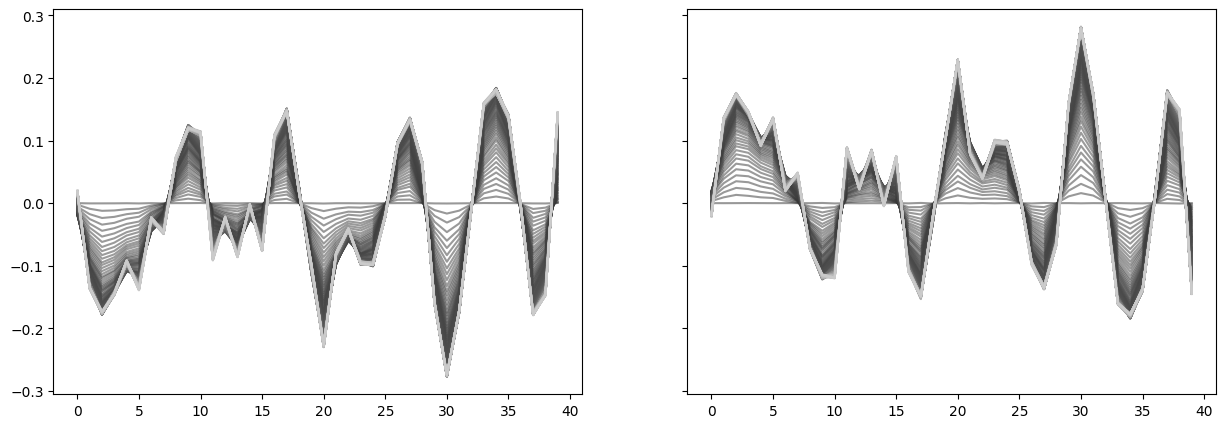

In [45]:
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-6 # setting we used to generate weights2
config['model_cls'] = models.GatedNet
config['activation'] = gate

weights2_gdln, metrics2_gdln = simulate(**config)
_ = plt.imshow(weights2_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_gdln, num_rows=1, num_cols=2, cmap='gray')

Let's try using the final RFs to determine the gating.

In [46]:
first_bump = weights2[-1,0] # note the first RF is negative when we train with Gaussian init

def gate(x):
    """
    The code below is a differentiable version of:
        pos_pre = jnp.dot(x, pos_bump)
        if pos_pre >= 0:
            return jnp.array([1., 0.])
        return jnp.array([0., 1.])
    """
    first_pre = jnp.dot(x, first_bump)
    w_ = first_pre / (jnp.abs(first_pre) + 1e-8)
    w = (w_ + 1) / 2
    return jnp.array([w, 1 - w])

Using JAX backend: cpu

Using configuration:
{'activation': <function gate at 0x1620a18a0>,
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 20,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x15b9302c0>,
 'init_scale': 1e-06,
 'kwargs': {},
 'learning_rate': 0.01,
 'model_cls': <class 'localization.models.feedforward.GatedNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x1585fc040>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
GatedNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  gate=<fun

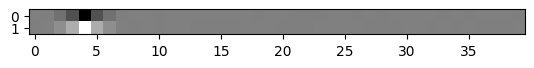

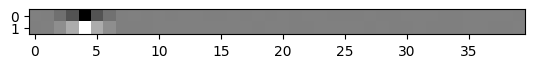

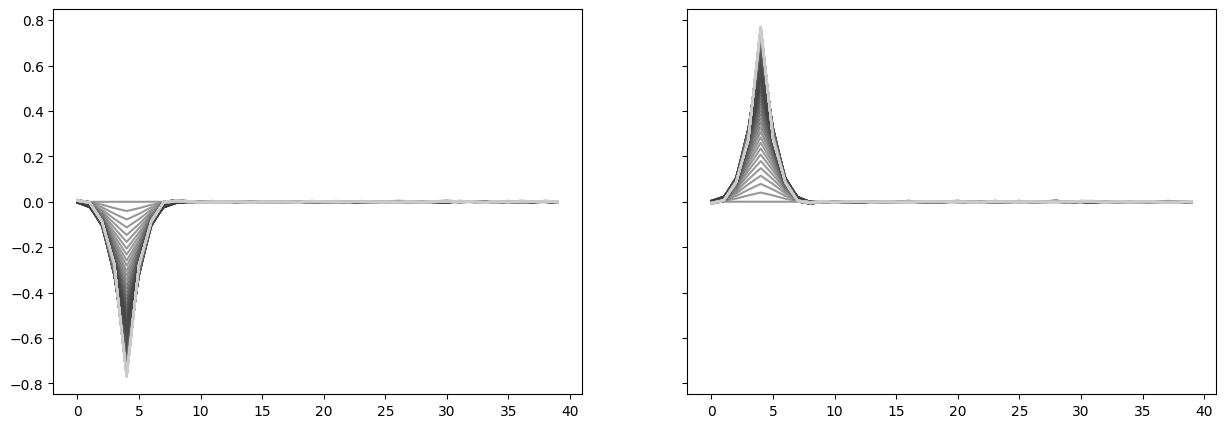

In [47]:
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-6 # setting we used to generate weights2
config['model_cls'] = models.GatedNet
config['activation'] = gate

weights2_gdln, metrics2_gdln = simulate(**config)
_ = plt.imshow(weights2_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_gdln, num_rows=1, num_cols=2, cmap='gray')

#### But this gating does not make as much sense here.
It assumes the RFs are exact opposites of each other at initialization.
This is true by construction for the small bump, but not for the Gaussian initialization.
(Though, if we use the final RFs to determine the gating, then it is approximately true.
But I want to see if we can relax this anyway, since it is certainly too restrictive in general.)

We'll fix this by making the gating for the two neurons independent of each other.

In [65]:
first_bump = weights2[-1,0] # note the first RF is negative when we train with Gaussian init
second_bump = weights2[-1,1]

def gate(x):
    """
    The code below is a differentiable version of:
        out = jnp.zeros(2)
        for i, filter in enumerate([first_bump, second_bump]):
            pre = jnp.dot(x, filter)
            if pre >= 0:
                out[i] = 1.
    """
    pre = jnp.array([jnp.dot(x, first_bump), jnp.dot(x, second_bump)])
    w_ = pre / (jnp.abs(pre) + 1e-8)
    w = (w_ + 1) / 2
    return w

In [70]:
# sanity check - looks good!
def gate2(x):
    out = np.zeros(2)
    for i, filter in enumerate([first_bump, second_bump]):
        pre = jnp.dot(x, filter)
        if pre >= 0:
            out[i] = 1.
    return out

for x_ in x[:10]:
    print( gate(x_), gate2(x_) )

[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]
[1.0000000e+00 2.9802322e-08] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]


Using JAX backend: cpu

Using configuration:
{'activation': <function gate at 0x1637711c0>,
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 20,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x15b9302c0>,
 'init_scale': 1e-06,
 'kwargs': {},
 'learning_rate': 0.01,
 'model_cls': <class 'localization.models.feedforward.GatedNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x1585fc040>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
GatedNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  gate=<fun

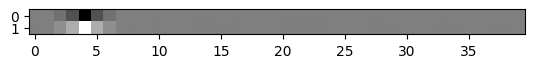

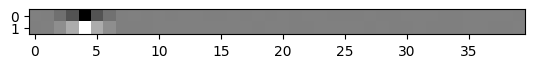

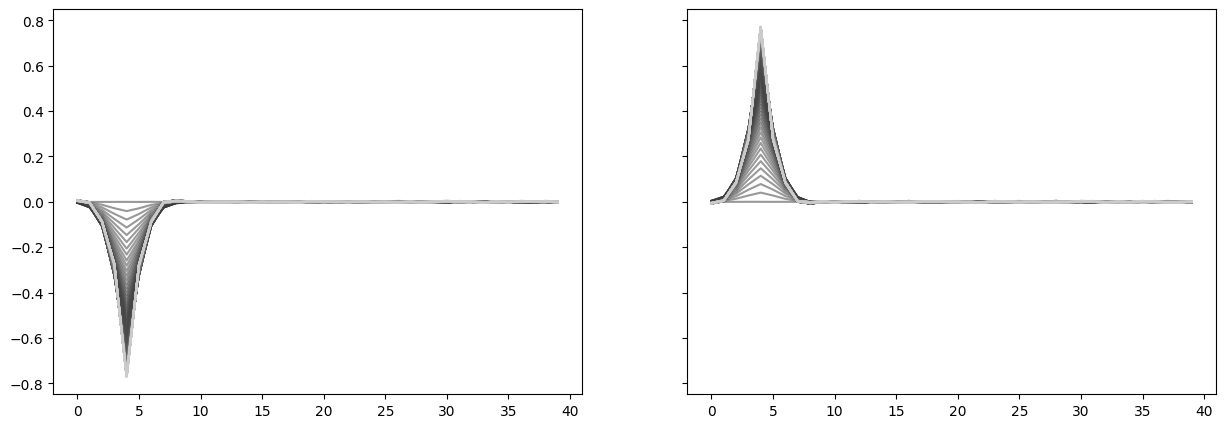

In [71]:
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-6 # setting we used to generate weights2
config['model_cls'] = models.GatedNet
config['activation'] = gate

weights2_gdln, metrics2_gdln = simulate(**config)
_ = plt.imshow(weights2_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_gdln, num_rows=1, num_cols=2, cmap='gray')

#### What if we go back to trying this with initial receptive fields?

I.e., the ones given by random initialization.

In [72]:
first_bump = weights2[0,0] # note the first RF is negative when we train with Gaussian init
second_bump = weights2[0,1]

def gate(x):
    """
    The code below is a differentiable version of:
        out = jnp.zeros(2)
        for i, filter in enumerate([first_bump, second_bump]):
            pre = jnp.dot(x, filter)
            if pre >= 0:
                out[i] = 1.
    """
    pre = jnp.array([jnp.dot(x, first_bump), jnp.dot(x, second_bump)])
    w_ = pre / (jnp.abs(pre) + 1e-8)
    w = (w_ + 1) / 2
    return w

Using JAX backend: cpu

Using configuration:
{'activation': <function gate at 0x1637732e0>,
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 20,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x15b9302c0>,
 'init_scale': 1e-06,
 'kwargs': {},
 'learning_rate': 0.01,
 'model_cls': <class 'localization.models.feedforward.GatedNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x1585fc040>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
GatedNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  gate=<fun

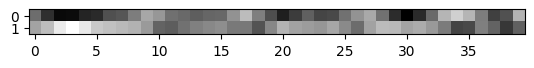

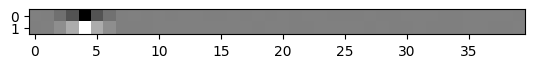

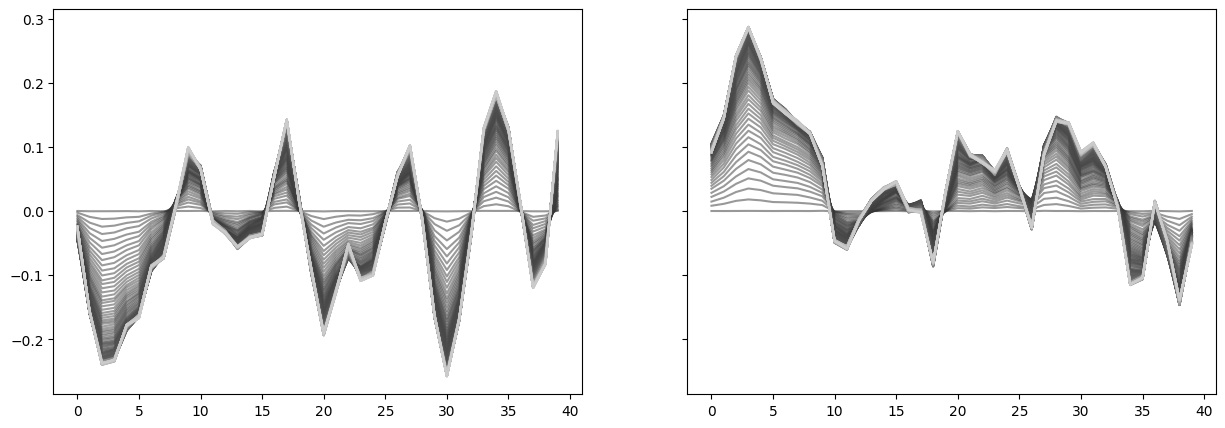

In [73]:
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-6 # setting we used to generate weights2
config['model_cls'] = models.GatedNet
config['activation'] = gate

weights2_gdln, metrics2_gdln = simulate(**config)
_ = plt.imshow(weights2_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_gdln, num_rows=1, num_cols=2, cmap='gray')

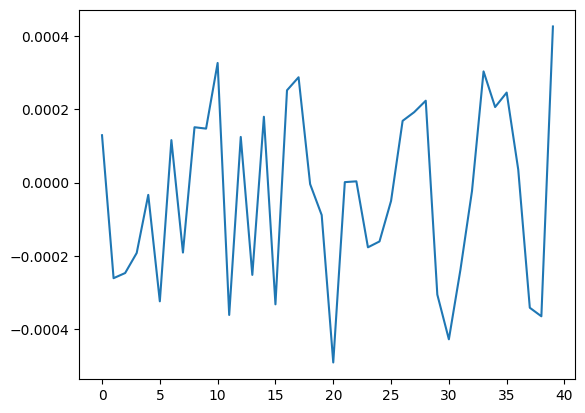

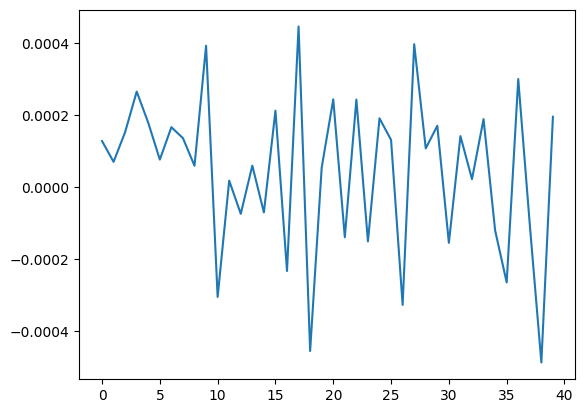

In [76]:
_ = plt.plot(first_bump)
plt.show()
_ = plt.plot(second_bump)

### Sign-flipping in equi- and over-paramterized regimes

Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 100,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x1505cc720>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 1.0,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 10000,
 'num_hiddens': 100,
 'optimizer_fn': <function sgd at 0x14d2804a0>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 10000000
Length of eval dataset: 1000
Length of train sampler: 10000000
Length of eval sampler: 1000
Model:
SimpleNet(
  fc1=Linear(
    weight=f32[100,40],
    bias=None,
    in_features=40,
    out_features=100,
    use_bias=False
  ),
  act=<wrapped

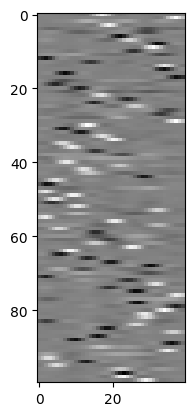

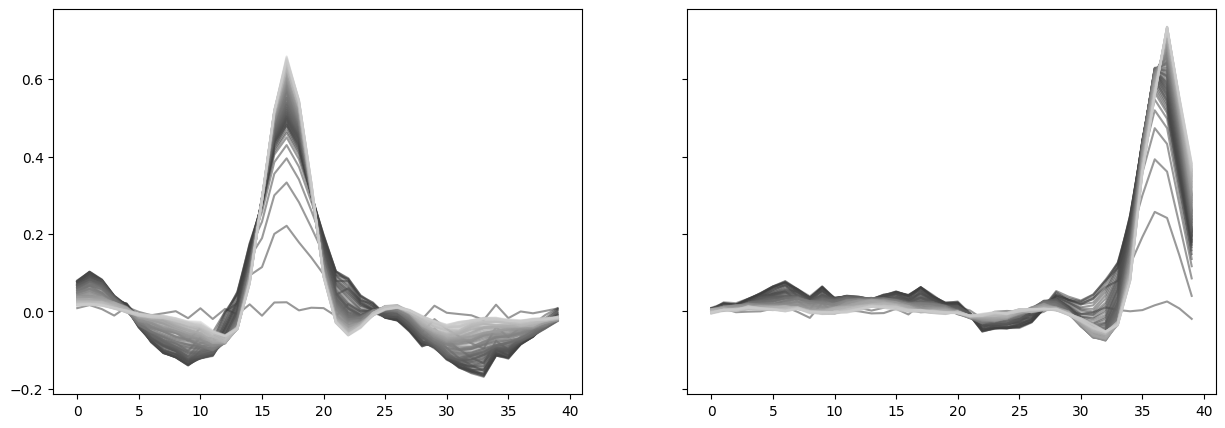

In [18]:
# re-run K=2 with a lower learning rate
config = config_.copy()
config['num_hiddens'] = 100
config['learning_rate'] = 1.0 # 0.1
config['num_epochs'] = 10000
config['use_bias'] = False
config['evaluation_interval'] = 100
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping

weights2, metrics2 = simulate_or_load(**config)
_ = plt.imshow(weights2[-1], cmap='gray')
fig, axs = plot_rf_evolution(weights2, num_rows=1, num_cols=2, cmap='gray')

In [16]:
# dataset
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), **config_)
x, y = dataset[:1000]
print(f"y = {y[0]}, {y[1]}")
print(f"x.shape = {x.shape}")

y = 1.0, 1.0
x.shape = (1000, 40)


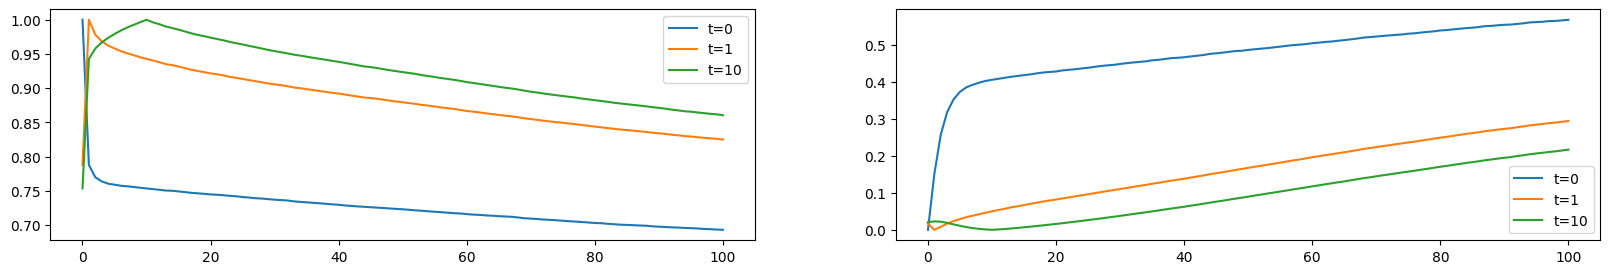

In [21]:
preacts2 = weights2 @ x.T
sign = (preacts2 > 0).astype(int)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3))

ax1.plot((sign == sign[0]).mean(axis=1).mean(axis=1), label='t=0')
ax1.plot((sign == sign[1]).mean(axis=1).mean(axis=1), label='t=1')
ax1.plot((sign == sign[10]).mean(axis=1).mean(axis=1), label='t=10')
ax1.legend()

ax2.plot( np.sqrt(np.square((sign != sign[0]) * preacts2).mean(axis=1).mean(axis=1)), label='t=0')
ax2.plot( np.sqrt(np.square((sign != sign[1]) * preacts2).mean(axis=1).mean(axis=1)), label='t=1')
ax2.plot( np.sqrt(np.square((sign != sign[10]) * preacts2).mean(axis=1).mean(axis=1)), label='t=10')
ax2.legend()

### Testing whether GLDN could explain gain's influence on localization

We've been using $g=3$ so far, and we've been achieving localization.
Let's see if we can set $g$ to be small, say 0.05, and find non-localized receptive fields.
(In the sigmoid model they become blurry—but I'm not sure if that's going to be the case here.)

(Also, I didn't test if this property of the gain parameter holds for ReLU activation in a DLN.
That should definitely be done as well.)

In [23]:
# re-run K=2 with a lower learning rate
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.small_bump_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping

weights2_sb, metrics2_sb = simulate_or_load(**config)
# _ = plt.imshow(weights2_sb[-1], cmap='gray')
# fig, axs = plot_rf_evolution(weights2_sb, num_rows=1, num_cols=2, cmap='gray')

Already simulated


In [24]:
first_bump = weights2_sb[0,0]

def gate(x):
    """
    The code below is a differentiable version of:
        pos_pre = jnp.dot(x, pos_bump)
        if pos_pre >= 0:
            return jnp.array([1., 0.])
        return jnp.array([0., 1.])
    """
    first_pre = jnp.dot(x, first_bump)
    w_ = first_pre / (jnp.abs(first_pre) + 1e-8)
    w = (w_ + 1) / 2
    return jnp.array([w, 1 - w])

Simulating
Using JAX backend: cpu

Using configuration:
{'activation': <function gate at 0x155b24540>,
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 20,
 'gain': 0.05,
 'init_fn': <function small_bump_init at 0x15069dbc0>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 0.5,
 'model_cls': <class 'localization.models.feedforward.GatedNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x14d2804a0>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
GatedNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  

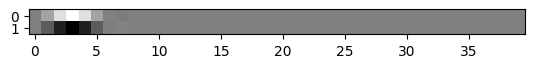

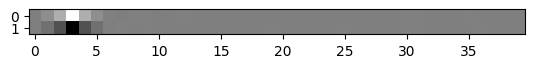

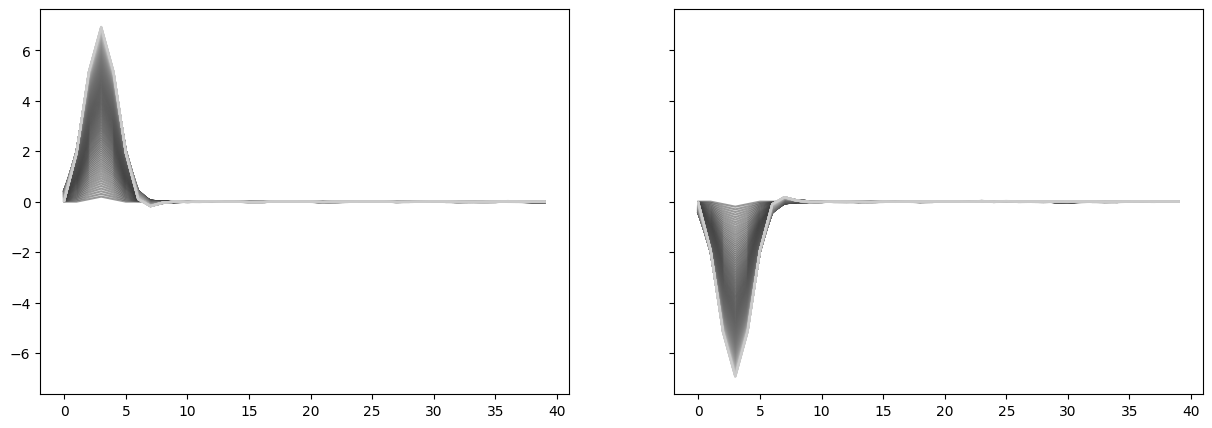

In [27]:
# COOL!
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.5 #0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.small_bump_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping
config['model_cls'] = models.GatedNet
config['activation'] = gate
config['gain'] = 0.05

weights2_sb_gdln, metrics2_sb_gdln = simulate_or_load(**config)
_ = plt.imshow(weights2_sb_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2_sb[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_sb_gdln, num_rows=1, num_cols=2, cmap='gray')

Simulating
Using JAX backend: cpu

Using configuration:
{'activation': <function gate at 0x155b24540>,
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 20,
 'gain': 0.05,
 'init_fn': <function xavier_normal_init at 0x1505cc720>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 0.5,
 'model_cls': <class 'localization.models.feedforward.GatedNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x14d2804a0>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
GatedNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),

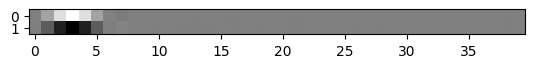

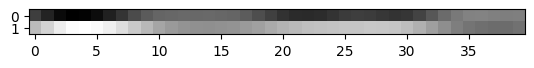

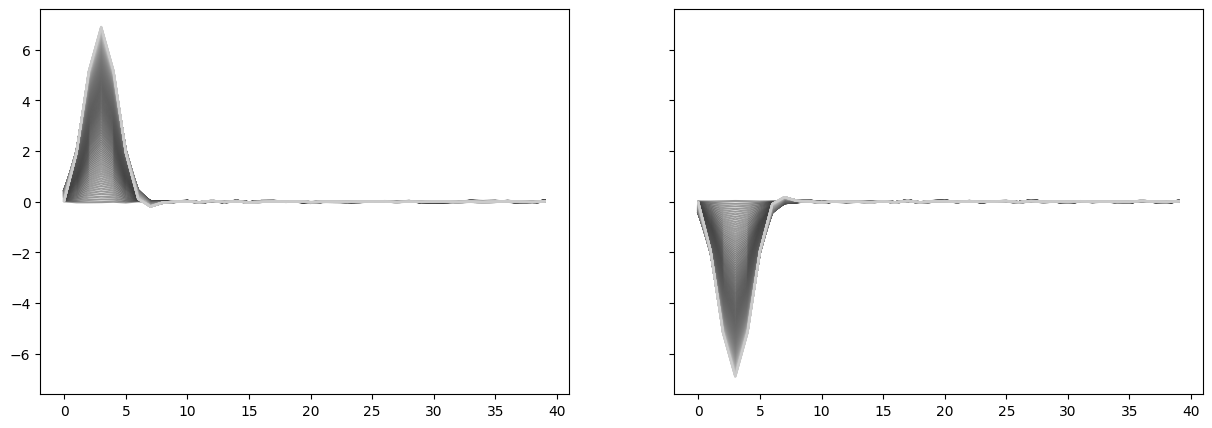

In [36]:
# le's try it with a Gaussian initialization
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.5 #0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 20
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping
config['model_cls'] = models.GatedNet
config['activation'] = gate
config['gain'] = 0.05

weights2_sb_gdln, metrics2_sb_gdln = simulate_or_load(**config)
_ = plt.imshow(weights2_sb_gdln[-1], cmap='gray')
plt.show()
_ = plt.imshow(weights2_sb[-1], cmap='gray') # the original, for comparison
fig, axs = plot_rf_evolution(weights2_sb_gdln, num_rows=1, num_cols=2, cmap='gray')

Already simulated


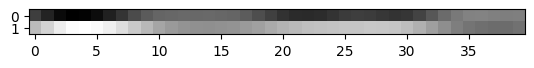

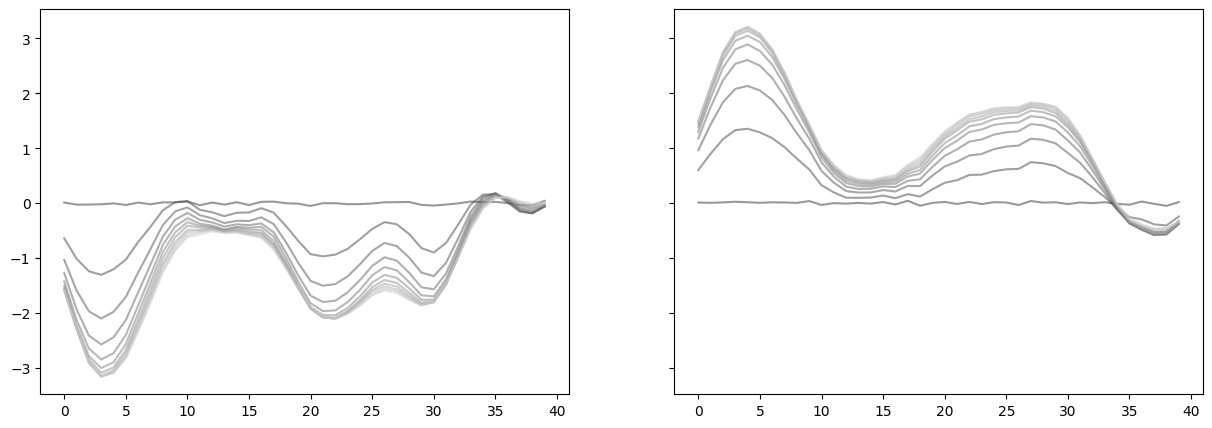

In [35]:
# COOL!
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.5 #0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 500
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping
config['model_cls'] = models.SimpleNet
config['activation'] = 'relu'
config['gain'] = 0.05

weights2_sb, metrics2_sb = simulate_or_load(**config)
_ = plt.imshow(weights2_sb[-1], cmap='gray')
fig, axs = plot_rf_evolution(weights2_sb, num_rows=1, num_cols=2, cmap='gray')

Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'batch_size': 1000,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'evaluation_interval': 500,
 'gain': 0.05,
 'init_fn': <function xavier_normal_init at 0x1505cc720>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 0.5,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 2,
 'optimizer_fn': <function sgd at 0x14d2804a0>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 0,
 'support': (-1, 1),
 'use_bias': False,
 'wandb_': False,
 'xi1': 2,
 'xi2': 1}

Length of train dataset: 5000000
Length of eval dataset: 1000
Length of train sampler: 5000000
Length of eval sampler: 1000
Model:
SimpleNet(
  fc1=Linear(
    weight=f32[2,40],
    bias=None,
    in_features=40,
    out_features=2,
    use_bias=False
  ),
  act=<wrapped funct

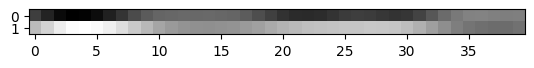

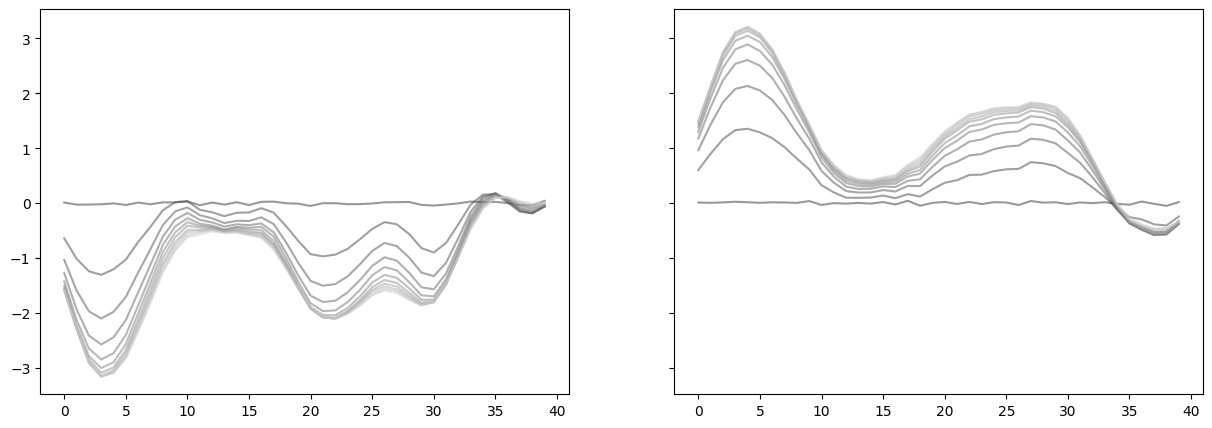

In [30]:
# COOL!
config = config_.copy()
config['num_hiddens'] = 2
config['learning_rate'] = 0.5 #0.01
config['num_epochs'] = 5000
config['use_bias'] = False
config['evaluation_interval'] = 500
config['init_fn'] = models.xavier_normal_init
config['init_scale'] = 1e-2 # 1e-6 works well, but still some sign flipping
config['model_cls'] = models.SimpleNet
config['activation'] = 'relu'
config['gain'] = 0.05

weights2_sb, metrics2_sb = simulate_or_load(**config)
_ = plt.imshow(weights2_sb[-1], cmap='gray')
fig, axs = plot_rf_evolution(weights2_sb, num_rows=1, num_cols=2, cmap='gray')

In [89]:
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), xi=6, xi2=6, gain=0.05, num_dimensions=40, num_exemplars=10000)
x, y = dataset[:10000]
i = 20
x_ = x[x[:,i] >= 0]
x__ = x_.mean(axis=0)
xx_ = (x_.T @ x_) / x_.shape[0]

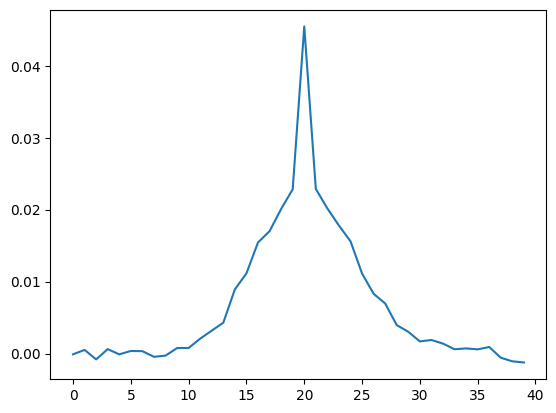

In [90]:
plt.plot(x__.T)

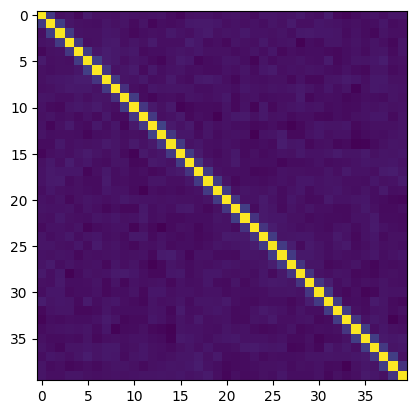

In [69]:
plt.imshow(xx_)

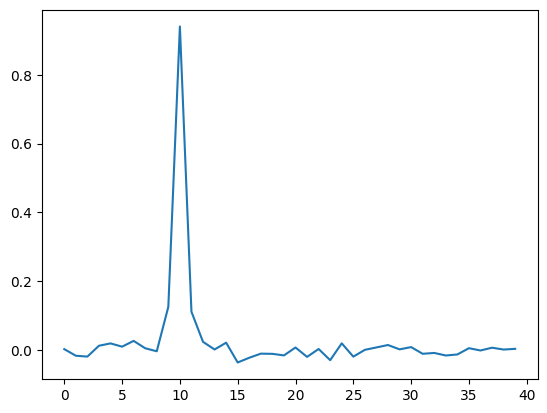

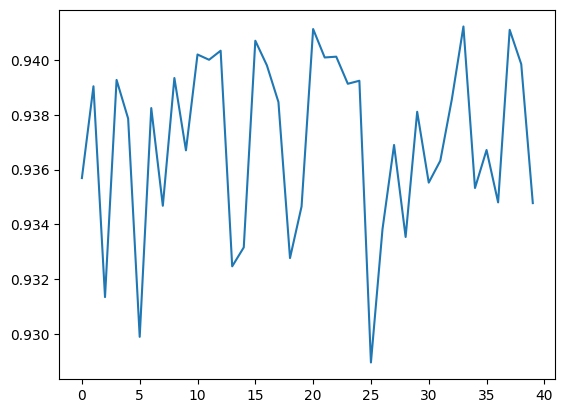

In [70]:
plt.plot(xx_[10])
plt.show()
plt.plot(np.diag(xx_))
plt.show()